**What is the SparkContext:** Main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster, and can be used to create RDDs, accumulators and broadcast variables on that cluster. Only one SparkContext may be active per JVM. You must stop() the active SparkContext before creating a new one.

In [1]:
from pyspark import SparkContext, SparkConf

In [2]:
help(SparkContext)

Help on class SparkContext in module pyspark.context:

class SparkContext(builtins.object)
 |  SparkContext(master: Optional[str] = None, appName: Optional[str] = None, sparkHome: Optional[str] = None, pyFiles: Optional[List[str]] = None, environment: Optional[Dict[str, Any]] = None, batchSize: int = 0, serializer: 'Serializer' = CloudPickleSerializer(), conf: Optional[pyspark.conf.SparkConf] = None, gateway: Optional[py4j.java_gateway.JavaGateway] = None, jsc: Optional[py4j.java_gateway.JavaObject] = None, profiler_cls: Type[pyspark.profiler.BasicProfiler] = <class 'pyspark.profiler.BasicProfiler'>, udf_profiler_cls: Type[pyspark.profiler.UDFBasicProfiler] = <class 'pyspark.profiler.UDFBasicProfiler'>, memory_profiler_cls: Type[pyspark.profiler.MemoryProfiler] = <class 'pyspark.profiler.MemoryProfiler'>)
 |  
 |  Main entry point for Spark functionality. A SparkContext represents the
 |  connection to a Spark cluster, and can be used to create :class:`RDD` and
 |  broadcast variables 

### First way to create SparkContext

In [3]:
conf = SparkConf().setAppName("PySpark_Example").setMaster("local[4]")
sc = SparkContext(conf=conf)

1. setAppName("PySpark_Example")
Ini buat kasih nama ke aplikasi Spark yang lagi dibuat.
Nama ini nanti nongol di web UI-nya Spark, jadi kalau lagi ngejalanin banyak aplikasi sekaligus, gampang bedain yang mana.
Di sini namanya dikasih "PySpark_Example", tapi bisa bebas kasih nama apa aja.
2. setMaster("local[4]")
Ini buat ngatur di mana aplikasi Spark dijalankan sama berapa core/CPU yang dipakai.
"local[4]" artinya jalanin di mode lokal (di komputer sendiri, nggak pakai cluster), dan pakai 4 core/thread buat eksekusi.
Kalau "local[*]", artinya pakai semua core yang ada di mesin.
Kalau cuma "local[1]", ya cuma pakai 1 core aja.

**Parameter Tambahan Lainnya (kalau perlu)**

- spark.executor.memory

Contoh: conf.set("spark.executor.memory", "2g")
Buat ngatur berapa banyak RAM yang dipakai setiap executor (2 GB di contoh ini).

- spark.driver.memory

Contoh: conf.set("spark.driver.memory", "4g")
Buat ngatur RAM yang dipakai driver aplikasi (di sini 4 GB).

- spark.executor.cores

Contoh: conf.set("spark.executor.cores", "2")
Ini buat ngatur berapa core per executor di cluster (nggak relevan kalau mode lokal).

- spark.default.parallelism

Contoh: conf.set("spark.default.parallelism", "8")
Ngatur jumlah partisi default buat operasi kayak reduceByKey atau join.

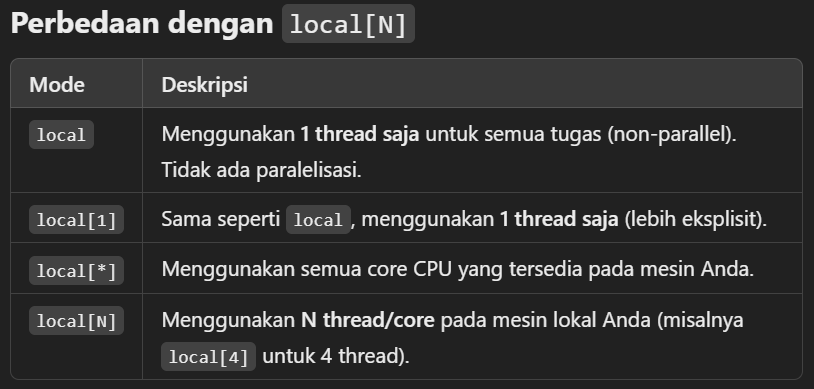

In [4]:
sc.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.master', 'local[4]'),
 ('spark.app.name', 'PySpark_Example'),
 ('spark.executor.id', 'driver')

In [5]:
sc.stop()

### Second way, Create a SparkContext that loads settings

In [6]:
sc = SparkContext()

In [7]:
sc.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.master', 'local[4]'),
 ('spark.app.name', 'PySpark_Example'),
 ('spark.app.startTime', '173245

In [8]:
sc.stop()

### Third way to combining both

In [9]:
# SparkContext(master: Optional[str] = None, appName: Optional[str] = None,......
sc = SparkContext("local", "First App")

Rdd - Reselient Distributed Dataset
An RDD in Spark is simply an immutable distributed collections of objects. Each RDD IS split into multiple
partitions, which may be computed on different nodes of the cluster.

RDD can be created in two ways: by loading an external dataset, or by transforming one RDD into another.

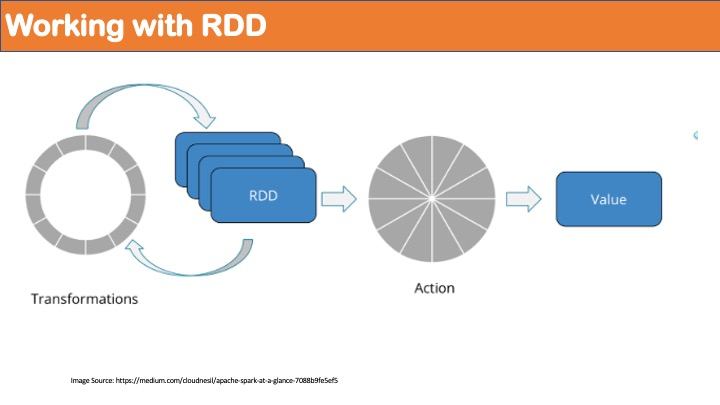

In [10]:
from IPython.display import Image
Image(filename='RDD_Intro.jpg')

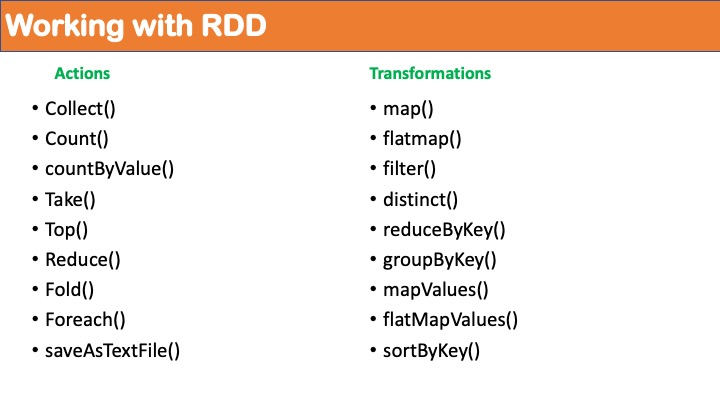

In [11]:
Image(filename='RDD_Actions_Transformations.jpg')

## Create RDD and their Basic Actions

In [12]:
names = sc.parallelize(['Adam','Cray','Shaun','Brain','Mark','Christ','Shail','Satya','Mark','Norby','Frans','Mark','Bill'])

In [13]:
type(names)

pyspark.rdd.RDD

In [14]:
names.collect() # Action

['Adam',
 'Cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [15]:
names.countByValue()

defaultdict(int,
            {'Adam': 1,
             'Cray': 1,
             'Shaun': 1,
             'Brain': 1,
             'Mark': 3,
             'Christ': 1,
             'Shail': 1,
             'Satya': 1,
             'Norby': 1,
             'Frans': 1,
             'Bill': 1})

Foreach is an action, it takes each element and applies a function, but it does not return a value. This is particularly useful in you have to call perform some calculation on an RDD and log the result somewhere else,
for example a database or call a REST API with each element in the RDD.

In [16]:

def f(x): print(x)
a=sc.parallelize([1, 2, 3, 4, 5]).foreach(lambda x : print(x))

In [17]:
type(a)

NoneType

In [18]:
a=sc.parallelize([(1,2),(2,4)])

In [19]:
a.countByValue()

defaultdict(int, {(1, 2): 1, (2, 4): 1})

In [20]:
names.collect()

['Adam',
 'Cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [21]:
names.take(5)

['Adam', 'Cray', 'Shaun', 'Brain', 'Mark']

In [22]:
employees = sc.textFile("employees.txt")

In [23]:
type(employees)

pyspark.rdd.RDD

In [24]:
employees.collect()

['Adam',
 'Cray ',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [25]:
employees.first()

'Adam'

In [26]:
employees.count()

13

In [ ]:
employees.top(5) # Action
# Sorts the data in descending order and returns the top 5 records

['Shaun', 'Shail', 'Satya', 'Norby', 'Mark']

In [28]:
employees.top(19)

['Shaun',
 'Shail',
 'Satya',
 'Norby',
 'Mark',
 'Mark',
 'Mark',
 'Frans',
 'Cray ',
 'Christ',
 'Brain',
 'Bill',
 'Adam']

In [29]:
employees.distinct().count()

11

## Taking number example for better clarity

In [30]:
help(sc.parallelize)

Help on method parallelize in module pyspark.context:

parallelize(c: Iterable[~T], numSlices: Optional[int] = None) -> pyspark.rdd.RDD[~T] method of pyspark.context.SparkContext instance
    Distribute a local Python collection to form an RDD. Using range
    is recommended if the input represents a range for performance.
    
    .. versionadded:: 0.7.0
    
    Parameters
    ----------
    c : :class:`collections.abc.Iterable`
        iterable collection to distribute
    numSlices : int, optional
        the number of partitions of the new RDD
    
    Returns
    -------
    :class:`RDD`
        RDD representing distributed collection.
    
    Examples
    --------
    >>> sc.parallelize([0, 2, 3, 4, 6], 5).glom().collect()
    [[0], [2], [3], [4], [6]]
    >>> sc.parallelize(range(0, 6, 2), 5).glom().collect()
    [[], [0], [], [2], [4]]
    
    Deal with a list of strings.
    
    >>> strings = ["a", "b", "c"]
    >>> sc.parallelize(strings, 2).glom().collect()
    [['a'], [

    c : :class:`collections.abc.Iterable`
        iterable collection to distribute
    numSlices : int, optional
        the number of partitions of the new RDD

In [31]:
# parallelize(c: Iterable[~T], numSlices: Optional[int] = None)
# Default numSlices is None or 1

num = sc.parallelize([5,5,4,3,2,9,2], 9)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [32]:
sc.parallelize((1,2,3,4,5,6,7,8,9,10,10)).collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]

In [33]:
sc.parallelize({1,2,3,4,5,6,7,8,9,10,10}).collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [34]:
num.take(4)

[5, 5, 4, 3]

In [35]:
num.countByValue()

defaultdict(int, {5: 2, 4: 1, 3: 1, 2: 2, 9: 1})

In [36]:
type(num)

pyspark.rdd.RDD

### GLOM : RDD OF LIST (ARRAY)

In [37]:
num.glom().collect()

[[], [5], [5], [4], [], [3], [2], [9], [2]]

In [38]:
num.glom().collect()[0]

[]

In [39]:
num.glom().collect()[1:]

[[5], [5], [4], [], [3], [2], [9], [2]]

In [40]:
type(num.glom())

pyspark.rdd.PipelinedRDD

In [41]:
num.max()

9

In [42]:
num.min()

2

In [43]:
num.mean()

4.285714285714286

#### reduce function -> action

In [44]:
help(num.reduce)

Help on method reduce in module pyspark.rdd:

reduce(f: Callable[[~T, ~T], ~T]) -> ~T method of pyspark.rdd.RDD instance
    Reduces the elements of this RDD using the specified commutative and
    associative binary operator. Currently reduces partitions locally.
    
    .. versionadded:: 0.7.0
    
    Parameters
    ----------
    f : function
        the reduce function
    
    Returns
    -------
    T
        the aggregated result
    
    See Also
    --------
    :meth:`RDD.treeReduce`
    :meth:`RDD.aggregate`
    :meth:`RDD.treeAggregate`
    
    Examples
    --------
    >>> from operator import add
    >>> sc.parallelize([1, 2, 3, 4, 5]).reduce(add)
    15
    >>> sc.parallelize((2 for _ in range(10))).map(lambda x: 1).cache().reduce(add)
    10
    >>> sc.parallelize([]).reduce(add)
    Traceback (most recent call last):
        ...
    ValueError: Can not reduce() empty RDD



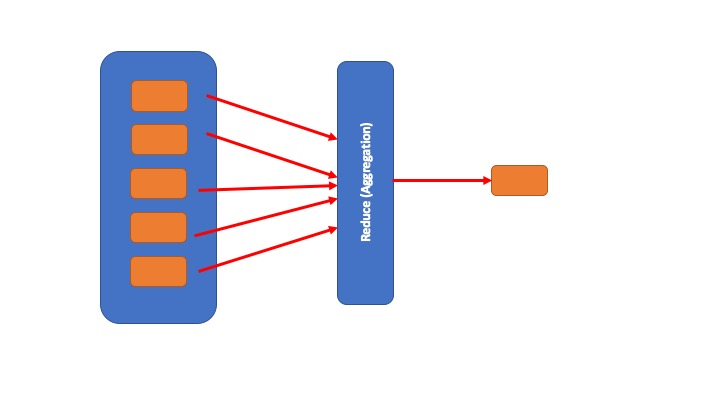

In [45]:
Image(filename='Action_Reduce.jpg')

In [46]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [47]:
num2 = sc.parallelize([1,2,3,4,5,6,7,8,9])

In [48]:
num.reduce(lambda a,b: a+b)

30

num2.reduce(lambda a,b,c: a+b+c)

error, reduce only takes 2 arguments

In [49]:
num.reduce(lambda a,b: a*b)

10800

In [50]:
num.reduce(lambda x,y: x if x > y else y)

9

In [51]:
def myfun(a,b):
    return a*2 + b*2

In [52]:
num.reduce(myfun)

872

In [53]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [54]:
num.takeOrdered(3)

[2, 2, 3]

#### fold function -> action

fold: the initial value for the accumulated result of each partition for the op operator,
and also the initial value for the combine results from different partitions

In [55]:
num = sc.parallelize([5,5,4,3,2,9,2],2)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [56]:
num.glom().collect()

[[5, 5, 4], [3, 2, 9, 2]]

In [57]:
num.reduce(lambda a,b: a+b)

30

In [58]:
num.reduce(lambda a,b: a*b)

10800

In [59]:
help(num.fold)

Help on method fold in module pyspark.rdd:

fold(zeroValue: ~T, op: Callable[[~T, ~T], ~T]) -> ~T method of pyspark.rdd.RDD instance
    Aggregate the elements of each partition, and then the results for all
    the partitions, using a given associative function and a neutral "zero value."
    
    The function ``op(t1, t2)`` is allowed to modify ``t1`` and return it
    as its result value to avoid object allocation; however, it should not
    modify ``t2``.
    
    This behaves somewhat differently from fold operations implemented
    for non-distributed collections in functional languages like Scala.
    This fold operation may be applied to partitions individually, and then
    fold those results into the final result, rather than apply the fold
    to each element sequentially in some defined ordering. For functions
    that are not commutative, the result may differ from that of a fold
    applied to a non-distributed collection.
    
    .. versionadded:: 0.7.0
    
    Paramet

    zeroValue : T
            the initial value for the accumulated result of each partition
        op : function

In [60]:
num.fold(2,lambda a,b:a+b) # ... + 2 * numSlices + 1

36

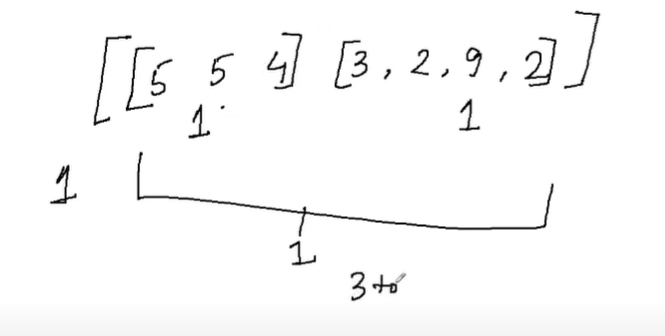

In [61]:
num.fold(2,lambda a,b : a*b) # ... * 2 ** numSlices + 1

86400

In [62]:
from operator import add
help(add)

Help on built-in function add in module _operator:

add(a, b, /)
    Same as a + b.



In [63]:
from operator import add
b=sc.parallelize([1, 2, 3, 4, 5])
b.fold(1, add)

17

In [64]:
from operator import add,mul
num3 = sc.parallelize([5,5,4,3,2,9,2]).fold(10,mul) # ... * 10 ** numSlices + 1
num3

1080000

In [65]:
b = sc.parallelize(range(1,10))

In [66]:
b.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]